# <center>Practice 7 - Intelligent Systems</center>
## Types of stars
![Types](images/TypesStars.jpg)
Ref.- [VectorStock](https://www.vectorstock.com/royalty-free-vector/diagram-showing-different-types-stars-vector-29444775)


In [4]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

from clean_variables import *
from select_variables import *

import csv 
import pandas as pd
import random
import matplotlib.pyplot as plt

seed = 7
numpy.random.seed(seed)

# Data Inputs, data cleansing and data analysis

### Getting the data inputs

In the first step we get the data inputs from a .csv file where we recieve 7 columns, 6 for the x variable and 1 for the y variable 

In [5]:
stars = pd.read_csv("assignment_ds.csv")

In [6]:
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.07730,17.08,Red,M,0
1,12098,689.000000,7.01000,0.02,Blue-white,A,3
2,2731,0.000437,0.08560,18.09,Red,M,0
3,37800,202900.000000,6.86000,-4.56,Blue,O,3
4,8570,0.000810,0.00970,14.20,Blue white,A,2
...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2
196,19860,0.001100,0.01310,11.34,Blue,B,2
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3
198,39000,204000.000000,10.60000,-4.70,Blue,O,3


#### Applying cleanliness to the data

2 columns of x variable are text and we will convert this type to a array of 0 and 1, first we filter the unique values and apply to lower a the colors column because some camps have upper letters that mark different for the similars texts that they don't have upper letters.

In [7]:
print(clean_colors(stars))
print(clean_spectral_classes(stars))

{'whitish', 'yellow-white', 'white-yellow', 'yellowish white', 'yellowish', 'red', 'blue white', 'blue-white', 'blue', 'orange', 'pale yellow orange', 'orange-red', 'white'}
{'G', 'B', 'K', 'M', 'O', 'A', 'F'}


We use this values for the variable x.

In [8]:
colors = ['whitish','red','pale yellow orange','white-yellow','blue','yellow-white','yellowish','yellowish white','orange-red','orange','white','blue white','blue-white']
spectral_classes = ['O', 'F', 'G', 'K', 'A', 'M', 'B']

#### Data Analysis

For the analysis we apply the covariance and correlation in order to observe the relationship that exists between the variables x and y, with the correlation being 0 the worst relationship and 1 or -1 the best relationship..
* The number columns can be applied for the analysis.
* The categories columns (texts) need be assigned a number for get the correlation.

In [9]:
stars_analysis = stars.copy()

In [10]:
stars_analysis['Number_Color']=ListCagetorietoNumber(stars_analysis.Color,colors)
stars_analysis['Numbr_Spectral_Class']=ListCagetorietoNumber(stars_analysis.Spectral_Class,spectral_classes)
stars_analysis

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Number_Color,Numbr_Spectral_Class
0,3453,0.000621,0.07730,17.08,Red,M,0,1,5
1,12098,689.000000,7.01000,0.02,Blue-white,A,3,12,4
2,2731,0.000437,0.08560,18.09,Red,M,0,1,5
3,37800,202900.000000,6.86000,-4.56,Blue,O,3,4,0
4,8570,0.000810,0.00970,14.20,Blue white,A,2,11,4
...,...,...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2,11,6
196,19860,0.001100,0.01310,11.34,Blue,B,2,4,6
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3,12,4
198,39000,204000.000000,10.60000,-4.70,Blue,O,3,4,0


### Covariance
Covariance is the value that reflects the amount by which any two variables vary jointly with respect to their arithmetic means. This measure allows us to know how the variables in question behave with respect to other variables.  
#### Covariance of the variables

The following table shows that:
* The star type depends on the Temperature variable in a proportional way.
* The star type depends on the variable L proportionally.
* The star type depends on the variable R in a proportional way.
* Star type depends on the variable A_M inversely proportionally.
* The star type depends on the variable Color proportionally.
* Star type depends on Spectral_Class variable inversely proportionally


In [11]:
cov_mat = stars_analysis.cov()
cov_mat= cov_mat.drop(['Temperature', 'L', 'R','A_M','Number_Color','Numbr_Spectral_Class'], axis=1)
cov_mat

,Type
Temperature,6428.207940
L,210878.875596
R,590.250620
A_M,-16.944131
Type,2.873467
Number_Color,1.534271
Numbr_Spectral_Class,-1.421407


### Correlation
Correlation is a type of association between two numerical variables, specifically it evaluates the trend (increasing or decreasing) in the data.

Two variables are associated when one variable gives us information about the other. Conversely, when there is no association, the increase or decrease of one variable tells us nothing about the behavior of the other variable.
![Types](images/correlation.png)
#### Correlation between the variables
The following table shows that:

* **Temperature**      : High Positive Correlation
* **L**                : High Positive Correlation
* **R**                : High Positive Correlation
* **A_M**	           : Perfect Negative Correlation
* **Color**            : Low Positive Correlation
* **Spectral_Class**   : Low Negative Correlation

In [24]:
corr_mat= stars_analysis.corr(method='spearman')
corr_mat=corr_mat.drop(['Temperature', 'L', 'R','A_M','Number_Color','Numbr_Spectral_Class'], axis=1)
corr_mat

,Type
Temperature,0.556591
L,0.846269
R,0.809410
A_M,-0.951591
Type,1.000000
Number_Color,0.319005
Numbr_Spectral_Class,-0.333179


#### Plots of correlations

R: 0.557


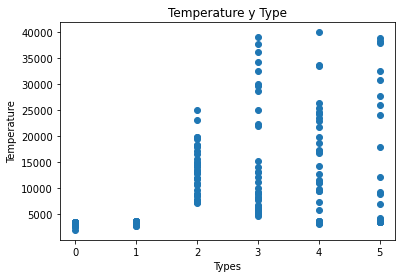

In [27]:
plt.scatter(stars_analysis['Type'],stars_analysis['Temperature'])
plt.title('Temperature y Type')
plt.xlabel("Types")
plt.ylabel("Temperature")
print('R:',corr_mat.iloc[0][0].round(3))

R: 0.846


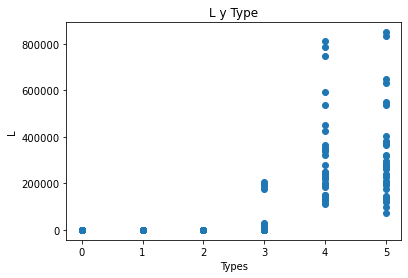

In [29]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['L'])
plt.title('L y Type')
plt.xlabel("Types")
plt.ylabel("L")
print('R:',corr_mat.iloc[1][0].round(3))

R: 0.809


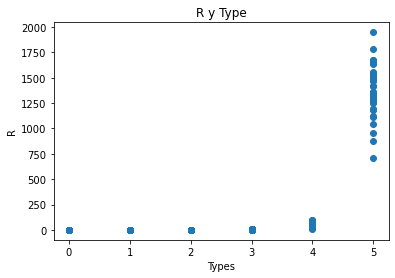

In [30]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars['R'])
plt.title('R y Type')
plt.xlabel("Types")
plt.ylabel("R")
print('R:',corr_mat.iloc[2][0].round(3))

R: -0.952


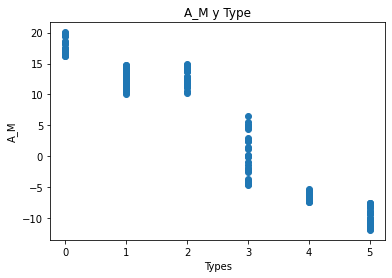

In [31]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars['A_M'])
plt.title('A_M y Type')
plt.xlabel("Types")
plt.ylabel("A_M")
print('R:',corr_mat.iloc[3][0].round(3))

R: 0.319


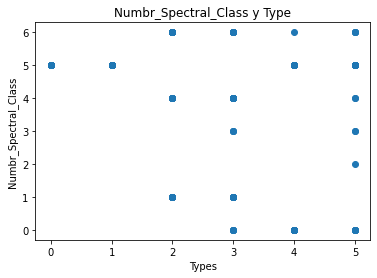

In [34]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['Numbr_Spectral_Class'])
plt.title('Numbr_Spectral_Class y Type')
plt.xlabel("Types")
plt.ylabel("Numbr_Spectral_Class")
print('R:',corr_mat.iloc[5][0].round(3))

R: -0.333


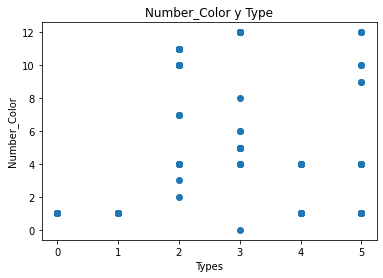

In [35]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['Number_Color'])
plt.title('Number_Color y Type')
plt.xlabel("Types")
plt.ylabel("Number_Color")
print('R:',corr_mat.iloc[6][0].round(3))

## Aplicattion of the Neuronal Network

stars_inputs are the variable x and types is the variable y.
Then we select aleatory indexs of the dataset in order to assign differents values for the training and different values for the test. (Its guarantied that a row chosen by his index only can be part of the training or the test part).
We separate 160 rows for the training part, if we get 200 rows in a dataset, 40 rows are for the test part.

In [611]:
types = stars.iloc[:,-1]
stars_inputs = get_inputs(stars,colors, spectral_classes)
stars_inputs

,Temperature,L,R,A_M,whitish,red,pale yellow orange,white-yellow,blue,yellow-white,...,white,blue white,blue-white,O,F,G,K,A,M,B
0,3453,0.000621,0.07730,17.08,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12098,689.000000,7.01000,0.02,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2731,0.000437,0.08560,18.09,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,37800,202900.000000,6.86000,-4.56,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8570,0.000810,0.00970,14.20,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
196,19860,0.001100,0.01310,11.34,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
197,13023,998.000000,6.21000,-1.38,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
198,39000,204000.000000,10.60000,-4.70,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [612]:
index_list = rand_index(stars.shape[0])
x_train, y_train, x_test, y_test = select_variables(stars_inputs,types,index_list, 160)

In this part we build a neuronal network that have caps with dimentions ,number of neurones and function of activation, this camps might be variate for the differents results.
The compile have a optimizer of neurones, a function of loss and the metrics that can be used.

We also prove different activation functions and we got the results:
    
bad activation models : 

softsign, tanh, sigmoid, exponential
    
good activation models :

selu, relu, softplus, softmax, elu

The first layer have the input layer and one hidden layer, the input layer must be have the same numbers of inputs for the columns of variable x, the number of neurones of hidden layers can be variate.

The last layer or output layer is an array of 0 and 1 that represent the type of output.

Types :

[0,1,2,3,4,5]

Domains for each type: 

[({0,1},{0,1},{0,1},{0,1},{0,1},{0,1}]

In [613]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 24), (160,), (40, 24), (40,))

In [617]:
model = Sequential()
model.add(Dense(64, input_dim=24, activation='elu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [618]:
#target_training
y = []
ls = []
y=IntegerEncode2(y_train)
target_test=IntegerEncode2(y_test)

In [619]:
num_epochs=200
history = model.fit(x_train, y,validation_data=(x_test, target_test), epochs=num_epochs,batch_size=64,verbose=1)


Epoch 1/200
3/3 [==============================] - 1s 134ms/step - loss: 22277.2129 - accuracy: 0.2812 - val_loss: 16864.6465 - val_accuracy: 0.2000
Epoch 2/200
3/3 [==============================] - 0s 25ms/step - loss: 19657.7852 - accuracy: 0.2562 - val_loss: 14839.0020 - val_accuracy: 0.2500
Epoch 3/200
3/3 [==============================] - 0s 30ms/step - loss: 17212.9746 - accuracy: 0.2875 - val_loss: 12966.9980 - val_accuracy: 0.2250
Epoch 4/200
3/3 [==============================] - 0s 27ms/step - loss: 15156.9893 - accuracy: 0.2375 - val_loss: 11152.6797 - val_accuracy: 0.3000
Epoch 5/200
3/3 [==============================] - 0s 36ms/step - loss: 12891.7363 - accuracy: 0.2688 - val_loss: 9353.0830 - val_accuracy: 0.2500
Epoch 6/200
3/3 [==============================] - 0s 29ms/step - loss: 10705.2510 - accuracy: 0.2937 - val_loss: 7546.0889 - val_accuracy: 0.2250
Epoch 7/200
3/3 [==============================] - 0s 26ms/step - loss: 8430.0488 - accuracy: 0.2562 - val_loss: 

3/3 [==============================] - 0s 36ms/step - loss: 5.5409 - accuracy: 0.7188 - val_loss: 5.5448 - val_accuracy: 0.6000
Epoch 115/200
3/3 [==============================] - 0s 32ms/step - loss: 7.3190 - accuracy: 0.6375 - val_loss: 4.1674 - val_accuracy: 0.5250
Epoch 116/200
3/3 [==============================] - 0s 33ms/step - loss: 9.2957 - accuracy: 0.5750 - val_loss: 4.3724 - val_accuracy: 0.5750
Epoch 117/200
3/3 [==============================] - 0s 25ms/step - loss: 5.2799 - accuracy: 0.5562 - val_loss: 5.2578 - val_accuracy: 0.6500
Epoch 118/200
3/3 [==============================] - 0s 35ms/step - loss: 11.3765 - accuracy: 0.6000 - val_loss: 9.9717 - val_accuracy: 0.7750
Epoch 119/200
3/3 [==============================] - 0s 37ms/step - loss: 8.3219 - accuracy: 0.6687 - val_loss: 11.1647 - val_accuracy: 0.5250
Epoch 120/200
3/3 [==============================] - 0s 27ms/step - loss: 4.3837 - accuracy: 0.6750 - val_loss: 5.9643 - val_accuracy: 0.6250
Epoch 121/200
3/3 

The next grafics let us know, how much the neuronal network classified the inputs correctly.

In [620]:
epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

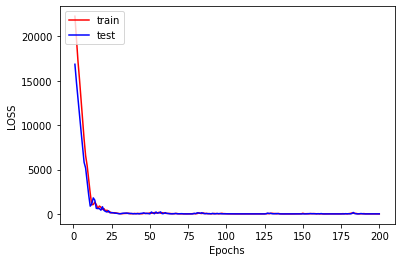

In [621]:
# Graficas de loss
plt.plot(epochs[:], loss[:], 'r')
plt.plot(epochs[:], val_loss[:], 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

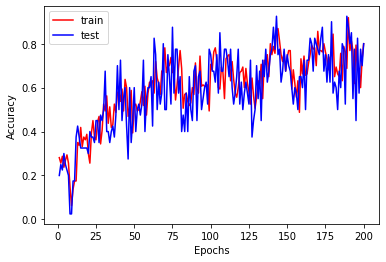

In [622]:
# Graficas de accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The next pass is evaluate the test part, we create a function for compare the quantities of asserts and the percentages of assert.

In [594]:
# evaluamos el modelo
scores = model.evaluate(x_train, y)
y_t = []
ls = []
for i in y_test:
    ls = [0 for i in range(6)]
    ls[i] = 1
    y_t.append(ls)
y_t = pd.DataFrame(y_t)
y_predicted = model.predict(x_test).round()

6/6 [==============================] - 0s 2ms/step - loss: 2.7198 - accuracy: 0.8895


In [595]:
stadistics(convert_at_type_array(y_predicted),convert_at_type_array(y_t.to_numpy()))

print(convert_at_type_array(y_predicted))
print(convert_at_type_array(y_t.to_numpy())) 


Cantidad total de pruebas: 10
Cantidad total de aciertos: 9
Porcentaje de aciertos: 90.0%
[2, 5, 5, 5, 2, 2, 4, 3, 0, 4]
[2, 5, 5, 5, 1, 2, 4, 3, 0, 4]


The final pass is save the model. We save the best models in two files (json for the model and h5 file for the weights of the neuronal network).

In [422]:
name = "prueba"

In [423]:
model_json = model.to_json()
with open("./jsons/"+name+".json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("./h_fives/"+name+".h5")
print("Modelo Guardado!")

Modelo Guardado!


## Resultados

When we save all the results we compare all the cases with the best score, the 3° experiment get the best result to be applied and we use this.